In [190]:
import numpy as np
import matplotlib.pyplot as plt

# implement a function taking X and K as imnputs that returns Phi(X), of shape NxK, the vandermonde matrix associated with X
# Possibly build it column by column

def genPhi(X, K):
    N = len(X)
    phi = np.zeros((N, K))
    for j in range(K):
            phi[:, j] = X**j
    return phi
x = np.array([10,20,30])

Phi = genPhi(x, 3)
Phi 
np.vander(x, 3)



array([[100,  10,   1],
       [400,  20,   1],
       [900,  30,   1]])

[1.         1.01020407 1.02061839 1.03124913 1.04210249 1.05318464
 1.06450177 1.07606006 1.0878657  1.09992487 1.11224375 1.12482853
 1.13768539 1.15082052 1.1642401  1.1779503  1.19195732 1.20626735
 1.22088655 1.23582112 1.25107725 1.2666611  1.28257888 1.29883675
 1.31544091 1.33239754 1.34971282 1.36739294 1.38544407 1.40387241
 1.42268414 1.44188544 1.46148249 1.48148148 1.50188859 1.52271001
 1.54395192 1.56562049 1.58772193 1.6102624  1.6332481  1.65668521
 1.6805799  1.70493837 1.7297668  1.75507137 1.78085827 1.80713368
 1.83390378 1.86117475 1.88895279 1.91724407 1.94605477 1.97539109
 2.0052592  2.03566529 2.06661555 2.09811615 2.13017328 2.16279312
 2.19598186 2.22974568 2.26409076 2.29902329 2.33454945 2.37067543
 2.40740741 2.44475157 2.48271409 2.52130117 2.56051897 2.6003737
 2.64087153 2.68201864 2.72382121 2.76628544 2.80941751 2.85322359
 2.89770988 2.94288255 2.9887478  3.0353118  3.08258073 3.13056079
 3.17925815 3.22867899 3.27882952 3.32971589 3.38134431 3.43372

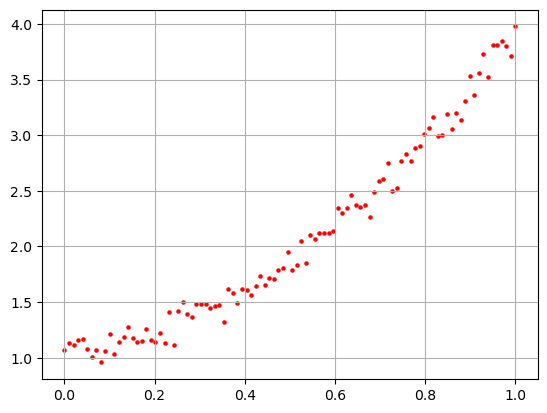

In [191]:
N = 100
K = 4

a = 0
b = 1

theta_true = np.ones((K,))

X = np.linspace(a, b, N)

#define Y s.t it is the solution of Phi(x)Theta = Y
Phi = np.vander(X, K)
Y = Phi@ theta_true

print(Y)

# corrupt Y with noise

sigma = 0.1 # variance of the noise

Y = Y + sigma * np.random.normal(0, 1, Y.shape[0]) # noisy Y

# plot

plt.scatter(X, Y, c= "red", s= 5)
plt.grid()


In [192]:
Theta_mle = np.linalg.inv(Phi.T@Phi)@Phi.T@Y #---> inefficient!!
print(Theta_mle)
Theta_mle = np.linalg.solve(Phi.T@Phi, Phi.T@Y)
print(Theta_mle)
# since Phi.T@Phi is SPD, cholesky decomposition is even better


[-0.06187282  2.60341045  0.31577693  1.06880457]
[-0.06187282  2.60341045  0.31577693  1.06880457]


Plot $f_{\theta}(x)$ in the same plot of X and Y to check the approximation

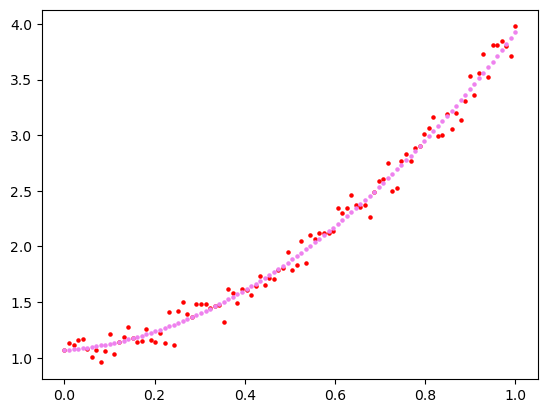

In [193]:
Y_approx = Phi@Theta_mle
plt.scatter(X, Y, c= "red", s= 5)

# XX = np.linspace(a, b, 1000)
# YY = np.vander(XX, K) @ Theta_mle

plt.scatter(X, Y_approx, c="violet", s= 5)
plt.show()

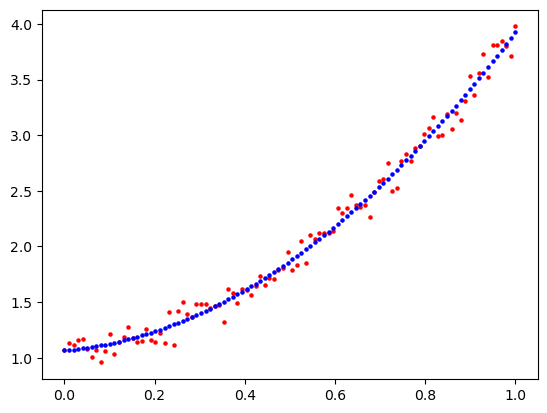

In [198]:
# X and Y are fixed

# pretend not to know K

k_trial = 3

Phi_k = np.vander(X, k_trial)
theta_mle_k = np.linalg.solve(Phi_k.T@Phi_k, Phi_k.T@Y)

# plot the new model on the same plot of the dataset

Y_k = Phi_k @ theta_mle_k

plt.scatter(X, Y, c= "red", s= 5)
plt.scatter(X, Y_k, c= "blue", s= 5)
plt.show()

# Maximum A-Posteriori estimation (MAP)

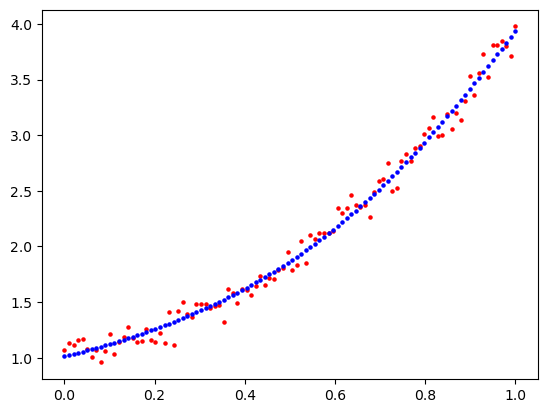

In [205]:
# X and Y are fixed
k_trial = 10
lmbda = .1
Phi_k = np.vander(X, k_trial)
theta_map_k = np.linalg.solve(Phi_k.T@Phi_k + lmbda*np.identity(k_trial), Phi_k.T@Y)

# plot the new model on the same plot of the dataset

Y_k = Phi_k @ theta_map_k

plt.scatter(X, Y, c= "red", s= 5)
plt.scatter(X, Y_k, c= "blue", s= 5)
plt.show()

the advantage is that this model is very sensitive to K, while it is not very sensitive with $\lambda$. \
But if I put a $\lambda$ too big, it will underfit. \
A common starting choice for $\lambda$ is $\lambda \in [0,1]$